# Train Data Loading

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df = pd.read_csv("bert_case.csv")

In [33]:
# Label the columns
df

,case_id,summary,side
0,1,The case involves an appeal by special leave a...,1
1,2,This case involves an appeal under Article 132...,0
2,3,This case involves an appeal by the State of W...,1
3,4,This\t is the ordinary accepted\r\nmeaning...,1
4,5,The case involves four consolidated appeals ag...,0
...,...,...,...
144,145,The appellant was injured in a motor accident ...,1
145,146,The case involves challenges to the selection ...,1
146,147,"In this case, the accused-applicant was charge...",1
147,148,This case involves a dispute between the appel...,1


# Data Cleaning and Preprocessing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   case_id  149 non-null    int64 
 1   summary  149 non-null    object
 2   side     149 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


In [35]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,case_id,summary,side


In [36]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

case_id    0
summary    0
side       0
dtype: int64

In [37]:
# removing duplicates

# df.drop_duplicates(inplace = True)

# Remove the duplicate rows
# df = df.drop_duplicates()

df['summary'] = df['summary'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["summary"] = df['summary'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["summary_new"] = df["summary"].apply(tokenizer.tokenize)
df["summary_new"] = df["summary_new"].apply(convert_list_to_str)


df

{'didn', 'his', 'most', 'd', 'our', 'against', 'after', 'than', 'does', 'out', "hasn't", 'have', 'some', 'their', 'nor', 'himself', "hadn't", "you're", 'few', "you'd", 'did', 'a', 'themselves', "mightn't", 'if', 'your', 'below', 'ourselves', "it's", "couldn't", "should've", 'ain', 'these', 'those', 'and', 'further', 'off', 'ma', 'with', 'o', 'then', 'now', "doesn't", 'that', 'my', "needn't", 'to', 'doesn', "wouldn't", 'wouldn', 'both', 'by', 'when', 'how', "weren't", 'this', 'very', 'up', 'too', 'so', 'them', 'i', 'its', 'itself', 'above', 'you', 'all', 'who', 'own', 'an', 'what', 'down', "won't", 'there', 'she', 'me', 'as', 's', "isn't", 'will', 'shouldn', 'ours', 'him', 'which', 'been', 'more', 't', 'just', 'hasn', 'any', "she's", 'under', "don't", 'needn', 'don', 'aren', 'll', "you'll", 'once', 'is', 'whom', 'having', 'the', 'wasn', 'between', 'had', 'myself', 'has', 'in', 'for', 'yourselves', 'won', 'yours', 'yourself', 'theirs', 'about', "aren't", 'am', 'isn', "shan't", "shouldn't

,case_id,summary,side,summary_new
0,1,case involves appeal special leave order high ...,1,case involves appeal special leave order high ...
1,2,case involves appeal article 132(1) constituti...,0,case involves appeal article 132 1 constitutio...
2,3,case involves appeal state west bengal judgmen...,1,case involves appeal state west bengal judgmen...
3,4,"ordinary accepted meaning word "" decree "" mean...",1,ordinary accepted meaning word decree meaning ...
4,5,case involves four consolidated appeals judgme...,0,case involves four consolidated appeals judgme...
...,...,...,...,...
144,145,appellant injured motor accident claimed compe...,1,appellant injured motor accident claimed compe...
145,146,case involves challenges selection process phy...,1,case involves challenges selection process phy...
146,147,"case, accused-applicant charged offenses vario...",1,case accused applicant charged offenses variou...
147,148,case involves dispute appellant-husband respon...,1,case involves dispute appellant husband respon...


In [38]:

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["summary_new"] = df["summary_new"].apply(lemmatize_sentence)
print(df)

df["summary"] = df["summary_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["summary_new"])
# print(df)

#fill 0 in mum
df['summary'] = df['summary'].fillna(0)

# Save the dataframe
df.to_csv("summary_clean.csv", index=False)
df


     case_id                                            summary  side  \
0          1  case involves appeal special leave order high ...     1   
1          2  case involves appeal article 132(1) constituti...     0   
2          3  case involves appeal state west bengal judgmen...     1   
3          4  ordinary accepted meaning word " decree " mean...     1   
4          5  case involves four consolidated appeals judgme...     0   
..       ...                                                ...   ...   
144      145  appellant injured motor accident claimed compe...     1   
145      146  case involves challenges selection process phy...     1   
146      147  case, accused-applicant charged offenses vario...     1   
147      148  case involves dispute appellant-husband respon...     1   
148      149  case, appellant, legally married second respon...     1   

                                           summary_new  
0    case involve appeal special leave order high c...  
1    case

,case_id,summary,side
0,1,case involve appeal special leave order high c...,1
1,2,case involve appeal article 132 1 constitution...,0
2,3,case involve appeal state west bengal judgment...,1
3,4,ordinary accept meaning word decree meaning at...,1
4,5,case involve four consolidated appeal judgment...,0
...,...,...,...
144,145,appellant injure motor accident claim compensa...,1
145,146,case involve challenge selection process physi...,1
146,147,case accuse applicant charge offenses various ...,1
147,148,case involve dispute appellant husband respond...,1


In [39]:
#check null
df['summary'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [40]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,149.0,75.000000,43.156691,1.0,38.0,75.0,112.0,149.0
side,149.0,0.637584,0.482319,0.0,0.0,1.0,1.0,1.0


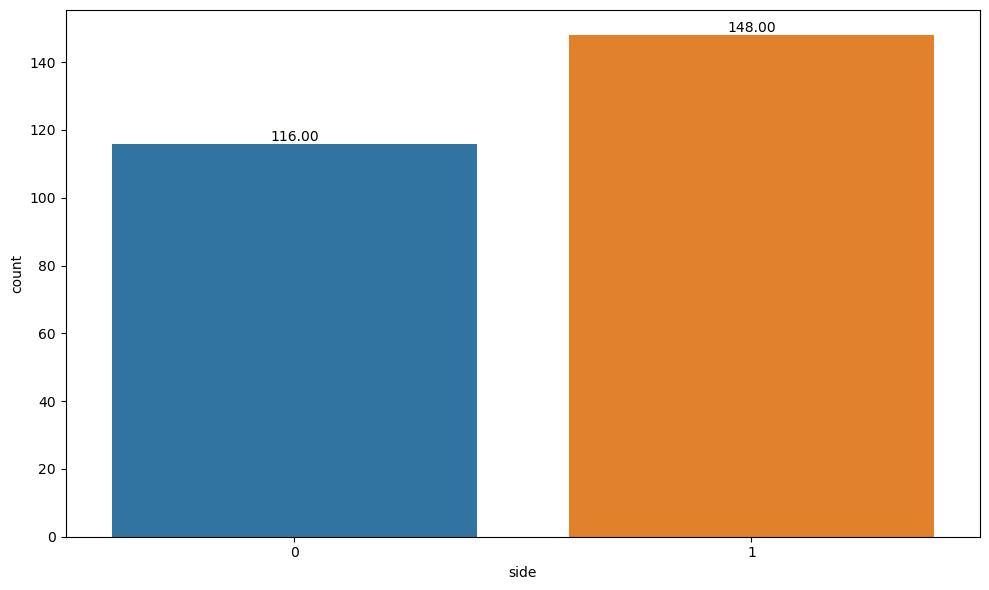

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='side', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [41]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['side']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['case_id', 'side', 'summary']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,case_id,summary,side
0,0.0,56.0,1.0
1,61.0,54.0,0.0
2,72.0,57.0,1.0
3,83.0,113.0,1.0
4,94.0,75.0,0.0


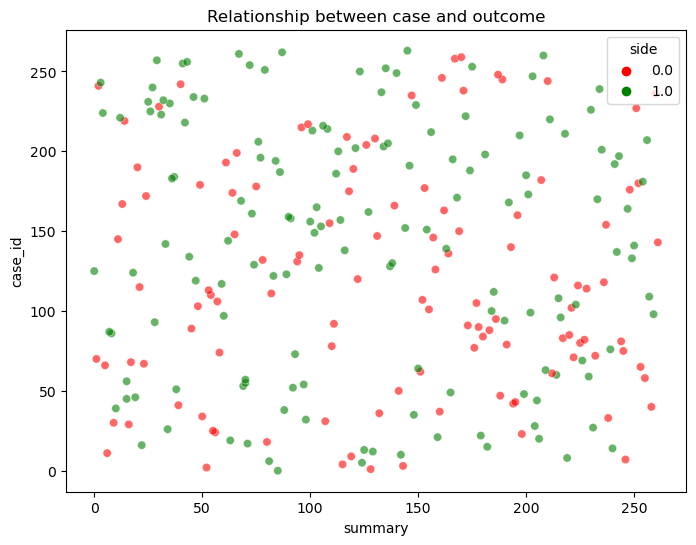

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.summary, y=df.case_id,hue=df.side,palette= ['red','green'] ,alpha=0.6)
plt.title("Relationship between case and outcome")
plt.show()

# BERT-BILSTM IMPLEMENTATION

In [19]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.decomposition import KernelPCA
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer

desired_dimension = 768
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=desired_dimension)

# Fit and transform the 'summary' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['summary'])

# Convert TF-IDF matrix to dense array
tfidf_dense = tfidf_matrix.toarray()

# Initialize Kernel PCA
kpca = KernelPCA(n_components=desired_dimension, kernel='rbf')

# Fit and transform the 'summary' column
reduced_summary = kpca.fit_transform(tfidf_dense)

reduced_dimension = reduced_summary.shape[1]
print(reduced_dimension)

def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    # Check if the data is a single string or a list of strings
    if isinstance(data, str):
        # If data is a single string, convert it to a list containing that string
        data = [data]

    # Tokenize each sentence in the data
    for sentence in data:
        # Tokenize the sentence
        bert_inp = bert_tokenizer(sentence, max_length=36,
                                  padding='max_length', pad_to_max_length=True,
                                  truncation=True, return_token_type_ids=False)

        # Append input IDs and attention masks to the respective lists
        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])

    # Convert lists to numpy arrays
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)

    return input_ids, attention_masks, labels


# Convert each row of reduced_summary to string
reduced_summary_strings = [' '.join(map(str, row)) for row in reduced_summary]

# Call data_process with the list of strings
input_ids, attention_masks, labels = data_process(reduced_summary_strings, df_copy["side"])


149


In [43]:
from transformers import BertTokenizer

def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    for sentence in data:
        bert_inp = bert_tokenizer.__call__(sentence, max_length=36,
                                           padding='max_length', pad_to_max_length=True,
                                           truncation=True, return_token_type_ids=False)

        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)
    return input_ids, attention_masks, labels

In [44]:
# return input_ids, attention_masks, labels
input_ids, attention_masks, labels = data_process(df_copy["summary"], df_copy["side"])
input_ids.shape


(149, 36)

In [45]:
dataset = pd.DataFrame({'input_ids': list(input_ids), 'attention_masks': list(attention_masks)}, columns=['input_ids', 'attention_masks'])
dataset

,input_ids,attention_masks
0,"[101, 2553, 9125, 5574, 2569, 2681, 2344, 2152...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[101, 2553, 9125, 5574, 3720, 14078, 1015, 455...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[101, 2553, 9125, 5574, 2110, 2225, 8191, 8689...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[101, 6623, 5138, 3574, 2773, 10037, 3574, 179...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[101, 2553, 9125, 2176, 10495, 5574, 8689, 215...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...
144,"[101, 10439, 24178, 1999, 25243, 5013, 4926, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
145,"[101, 2553, 9125, 4119, 4989, 2832, 3558, 2731...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
146,"[101, 2553, 26960, 23761, 3715, 25173, 2536, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
147,"[101, 2553, 9125, 7593, 10439, 24178, 3129, 68...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [46]:
labels = labels.astype(np.int64)
labels

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

# BERT BILSTM Model Defination

In [47]:
import gc

import torch
from torch import nn
from transformers import BertModel

class BERT_LSTM(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers, bidirectional):
        super(BERT_LSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)#outpt of bert emb size = 768, ip for bi lstm
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0]
        x = self.dropout(x)
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])
        return self.sigmoid(x)

In [48]:
import gc
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd

train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
                             random_state=2018, test_size=0.2, stratify=labels)

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                         random_state=2018, test_size=0.5, stratify=temp_labels)


del temp_text
gc.collect()
torch.cuda.empty_cache()

train_count = len(train_labels)
test_count = len(test_labels)
val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for train set
train_seq = torch.tensor(train_text['input_ids'].tolist())
train_mask = torch.tensor(train_text['attention_masks'].tolist())
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(val_text['input_ids'].tolist())
val_mask = torch.tensor(val_text['attention_masks'].tolist())
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())

print("in fn")
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# Train Sampler
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# Sequence sampler
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# freeze bert parameters
for param in bert.parameters():
    param.requires_grad = False

# pass the pre-trained BERT to our define architecture
model = BERT_LSTM(num_classes=2, hidden_size=128, num_layers=2, bidirectional=True)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

#Loss Function
cross_entropy = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)


in fn
cpu


# Training and Validation Loop

In [50]:
import gc
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

best_accuracy = 0.0
best_model_state = None

# Define the number of epochs
epochs = 5
current = 1

train_acc_values = []
val_acc_values = []

# Training loop
while current <= epochs:
    print(f'\nEpoch {current} / {epochs}:')

    # Train model
    train_loss, _, train_acc = train()

    # Evaluate model
    valid_loss, _, valid_acc = evaluate()

    # Check if the current epoch's accuracy is the best so far
    if valid_acc > best_accuracy:
        best_accuracy = valid_acc
        best_model_state = model.state_dict()

    print(f'\n\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    print(f'\n\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')
    train_acc_values.append(train_acc)
    val_acc_values.append(valid_acc)
    current = current + 1
    current = current + 1

# Save the model with the best accuracy
if best_model_state is not None:
    torch.save(best_model_state, 'best_model.pth')

# Get predictions for test data
gc.collect()
torch.cuda.empty_cache()

# Load the best model for evaluation
if best_model_state is not None:
    model.load_state_dict(best_model_state)



Epoch 1 / 5:
Batch 4/4 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=-0.01, accuracy=0.6875

Evaluating...
Batch 1/1 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0

Training Loss: -0.017
Validation Loss: -0.018


Training Accuracy: 0.633
Validation Accuracy: 0.667

Epoch 3 / 5:
Batch 4/4 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=-0.01, accuracy=0.6255

Evaluating...
Batch 1/1 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0

Training Loss: -0.018
Validation Loss: -0.019


Training Accuracy: 0.633
Validation Accuracy: 0.667

Epoch 5 / 5:
Batch 4/4 |███████████████████████████████████████████████████████████████████████████████████████████

In [52]:
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

print("Performance:")
# Model's performance
preds = np.argmax(preds, axis=1)

print("Accuracy: " + str(accuracy_score(test_y, preds)))

Performance:
Accuracy: 0.6
